(solow)=
# 索洛-斯旺增长模型

在本讲座中，我们将回顾一个由[罗伯特·索洛（1925--2023）](https://en.wikipedia.org/wiki/Robert_Solow)和[特雷弗·斯旺（1918--1989）](https://en.wikipedia.org/wiki/Trevor_Swan)提出的著名模型。

这个模型用于研究长期经济增长。

尽管模型简单，但它包含一些有趣的教训。

我们将使用以下导入。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 模型

在索洛-斯旺经济中，经济主体将其当前收入的固定比例用于储蓄维持或增加资本存量。

资本与劳动力相结合生产产出，产出又支付给工人和资本所有者。

为了简化问题，我们忽略人口和生产力增长。

对于每个整数 $t \geq 0$，第 $t$ 期的产出 $Y_t$ 由 $Y_t = F(K_t, L_t)$ 给出，其中 $K_t$ 是资本，$L_t$ 是劳动力，$F$ 是总生产函数。

假设函数 $F$ 是非负的，且是**一阶齐次的**，意味着

$$
    F(\lambda K, \lambda L) = \lambda F(K, L)
    \quad \text{对于所有 } \lambda \geq 0
$$

具有这种特性的生产函数包括：

* **科布-道格拉斯**函数 $F(K, L) = A K^{\alpha} L^{1-\alpha}$，其中 $0 \leq \alpha \leq 1$。

* **CES**函数 $F(K, L) = \left\{ a K^\rho + b L^\rho \right\}^{1/\rho}$，其中 $a, b, \rho > 0$。

这里，$\alpha$ 是资本的产出弹性，$\rho$ 是决定资本和劳动力之间替代弹性的参数。

我们假设是封闭经济，因此总国内投资等于总国内储蓄。

储蓄率是一个常数 $s$，满足 $0 \leq s \leq 1$，所以总投资和储蓄都等于 $s Y_t$。

资本会贬值：如果不通过投资补充，今天的一单位资本明天会变成 $1-\delta$ 单位。

因此，

$$
    K_{t+1} = s F(K_t, L_t) + (1 - \delta) K_t
$$

没有人口增长，$L_t$ 等于某个常数 $L$。

令 $k_t := K_t / L$，并使用一阶齐次性，现在得到

$$
    k_{t+1}
    = s \frac{F(K_t, L)}{L} + (1 - \delta) \frac{K_t}{L}
    = s \frac{F(K_t, L)}{L} + (1 - \delta) k_t
    = s F(k_t, 1) + (1 - \delta) k_t
$$

令 $f(k) := F(k, 1)$，资本动态的最终表达式为

```{math}
:label: solow
    k_{t+1} = g(k_t)
    \text{ where } g(k) := s f(k) + (1 - \delta) k
```

我们的目标是了解随时间变化的 $k_t$ 的演变，给定一个外生的初始资本存量 $k_0$。

## 图形化视角

为了理解序列 $(k_t)_{t \geq 0}$ 的动态，我们使用45度图。

为此，我们首先需要为 $f$ 指定函数形式并为参数赋值。

我们选择科布-道格拉斯规格 $f(k) = A k^\alpha$，并设定 $A=2.0$，$\alpha=0.3$，$s=0.3$ 和 $\delta=0.4$。

然后绘制方程 {eq}`solow` 中的函数 $g$，以及45度线。

让我们定义这些常数。

In [2]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = 0.25
xmin, xmax = 0, 3

现在我们来定义函数$g$。

In [3]:
def g(A, s, alpha, delta, k):
    return A * s * k**alpha + (1 - delta) * k

让我们来绘制函数$g$的45度图。

In [4]:
def plot45(kstar=None):
    xgrid = np.linspace(xmin, xmax, 12000)

    fig, ax = plt.subplots()

    ax.set_xlim(xmin, xmax)

    g_values = g(A, s, alpha, delta, xgrid)

    ymin, ymax = np.min(g_values), np.max(g_values)
    ax.set_ylim(ymin, ymax)

    lb = r'$g(k) = sAk^{\alpha} + (1 - \delta)k$'
    ax.plot(xgrid, g_values,  lw=2, alpha=0.6, label=lb)
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')

    if kstar:
        fps = (kstar,)

        ax.plot(fps, fps, 'go', ms=10, alpha=0.6)

        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                 xy=(kstar, kstar),
                 xycoords='data',
                 xytext=(-40, -60),
                 textcoords='offset points',
                 fontsize=14,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='upper left', frameon=False, fontsize=12)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((0, 1, 2, 3))

    ax.set_xlabel('$k_t$', fontsize=12)
    ax.set_ylabel('$k_{t+1}$', fontsize=12)

    plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_6240/3107437576.py:15: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')


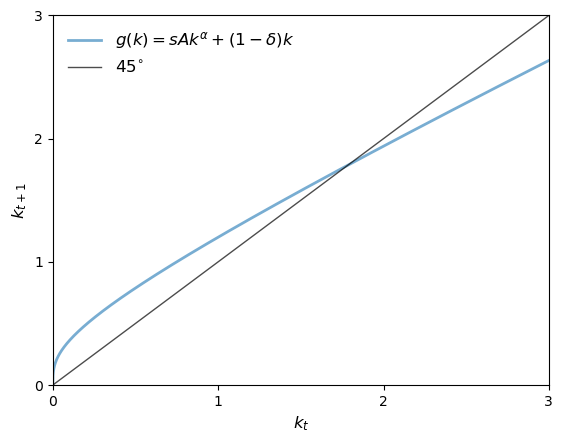

In [5]:
plot45()

假设在某个 $k_t$ 处，$g(k_t)$ 的值严格高于45度线。

那么我们有 $k_{t+1} = g(k_t) > k_t$，人均资本增加。

如果 $g(k_t) < k_t$，则人均资本下降。

如果 $g(k_t) = k_t$，那么我们就处于**稳态**，$k_t$ 保持不变。

（模型的{ref}`稳态<scalar-dynam:steady-state>`是映射 $g$ 的[不动点](https://en.wikipedia.org/wiki/Fixed_point_(mathematics))。）

从图中 $g$ 函数的形状可以看出，在 $(0, \infty)$ 内存在唯一的稳态。

它满足方程 $k = s Ak^{\alpha} + (1-\delta)k$，因此可以表示为

```{math}
:label: kstarss
    k^* := \left( \frac{s A}{\delta} \right)^{1/(1 - \alpha)}
```

如果初始资本低于 $k^*$，那么资本会随时间增加。

如果初始资本高于这个水平，则相反。

让我们绘制45度图来在图中显示 $k^*$。

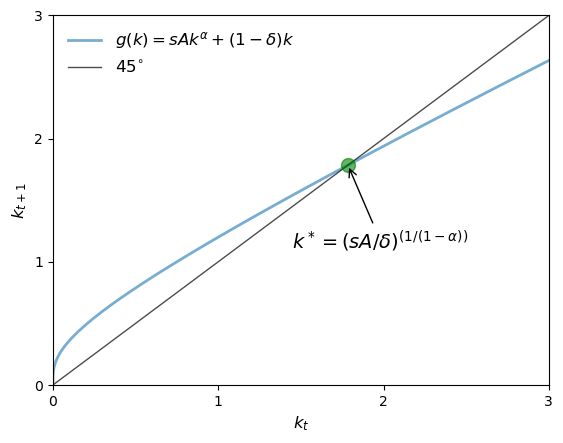

In [6]:
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot45(kstar)

根据我们的图形分析，似乎无论初始资本 $k_0$ 如何，$(k_t)$ 都会收敛到 $k^*$。

这是一种{ref}`全局稳定性 <scalar-dynam:global-stability>`的形式。

下图显示了在上述参数化条件下，从三个不同的初始条件出发的资本时间路径。

在这种参数化下，$k^* \approx 1.78$。

让我们定义常数和三个不同的初始条件

In [7]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = np.array([.25, 1.25, 3.25])

ts_length = 20
xmin, xmax = 0, ts_length
ymin, ymax = 0, 3.5

In [8]:
def simulate_ts(x0_values, ts_length):

    k_star = (s * A / delta)**(1/(1-alpha))
    fig, ax = plt.subplots(figsize=[11, 5])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    ts = np.zeros(ts_length)

    # 模拟和绘制时间序列
    for x_init in x0_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = g(A, s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %x_init)
    ax.plot(np.arange(ts_length), np.full(ts_length,k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()

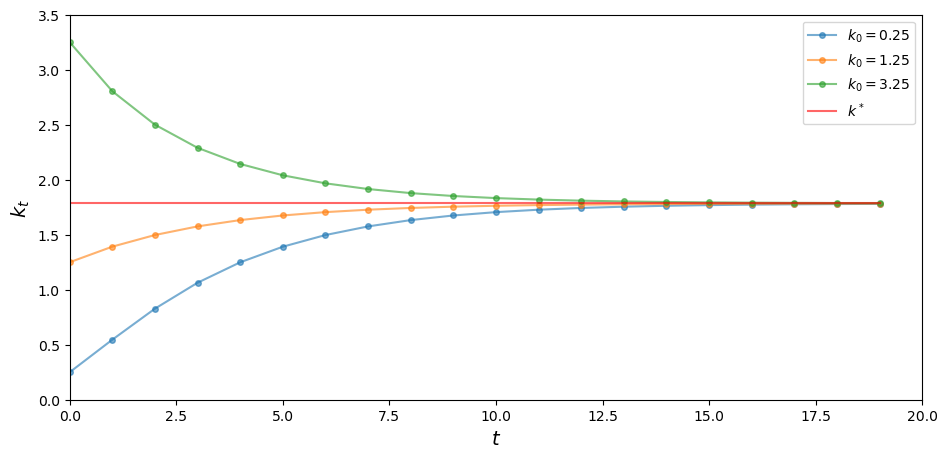

In [9]:
simulate_ts(x0, ts_length)

如预期，图中的所有时间路径都收敛于 $k^*$。

## 连续时间的增长

在本节中，我们将研究 Solow--Swan 增长模型的连续时间版本。我们将看到连续时间提供的平滑如何能简化我们的分析。

回顾一下，资本的离散时间动态由以下公式给出：$k_{t+1} = s f(k_t) + (1 - \delta) k_t$。

简单重新排列可得到单位时间的变化率：

$$
    \Delta k_t = s f(k_t) - \delta k_t
    \quad \text{其中} \quad
    \Delta k_t := k_{t+1}  - k_t
$$

将时间步长趋近于零得到连续时间极限

```{math}
:label: solowc
    k'_t = s f(k_t) - \delta k_t
    \qquad \text{with} \qquad
    k'_t := \frac{d}{dt} k_t
```

我们的目标是了解 $k_t$ 随时间的演变，给定初始存量 $k_0$。

{eq}`solowc` 的**稳态**是一个值 $k^*$，在该值处资本保持不变，即 $k'_t = 0$ 或等价地，$s f(k^*) = \delta k^*$。

我们假设 $f(k) = Ak^\alpha$，所以 $k^*$ 满足 $s A k^\alpha = \delta k$。

解决方案与离散时间情况相同——参见 {eq}`kstarss`。

动态在下一个图中表示，保持我们上面使用的参数化。

写作 $k'_t = g(k_t)$，其中 $g(k) = s Ak^\alpha - \delta k$，$g(k) > 0$ 的 $k$ 值意味着 $k'_t > 0$，所以资本在增加。

当 $g(k) < 0$ 时，相反的情况发生。再一次，低水平资本时储蓄的高边际回报与高水平资本时的低回报率相结合，产生了全局稳定性。

为了在图中看到这一点，让我们定义以下常数

In [10]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4

接下来，我们为连续时间的增长定义函数 $g$

In [11]:
def g_con(A, s, alpha, delta, k):
    return A * s * k**alpha - delta * k

In [12]:
def plot_gcon(kstar=None):

    k_grid = np.linspace(0, 2.8, 10000)

    fig, ax = plt.subplots(figsize=[11, 5])
    ax.plot(k_grid, g_con(A, s, alpha, delta, k_grid), label='$g(k)$')
    ax.plot(k_grid, 0 * k_grid, label="$k'=0$")

    if kstar:
        fps = (kstar,)

        ax.plot(fps, 0, 'go', ms=10, alpha=0.6)


        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                 xy=(kstar, 0),
                 xycoords='data',
                 xytext=(0, 60),
                 textcoords='offset points',
                 fontsize=12,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='lower left', fontsize=12)

    ax.set_xlabel("$k$",fontsize=10)
    ax.set_ylabel("$k'$", fontsize=10)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((-0.3, 0, 0.3))

    plt.show()

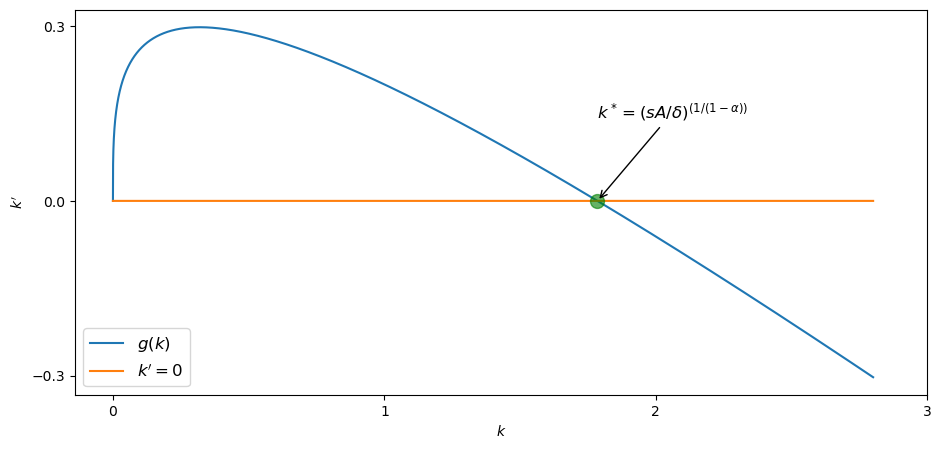

In [13]:
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot_gcon(kstar)

这从启发式的角度展示了固定参数化的全局稳定性，但我们如何为一系列合理的参数形式地证明同样的结论呢？

在离散时间的情况下，很难得到$k_t$的简洁表达式。

在连续时间中，这个过程更加简单：我们可以得到一个相对简单的$k_t$表达式，它可以指定整个路径。

第一步是

设$x_t := k_t^{1-\alpha}$，这样$x'_t = (1-\alpha) k_t^{-\alpha} k'_t$。
将其代入$k'_t = sAk_t^\alpha - \delta k_t$，得到以下线性微分方程

```{math}
:label: xsolow
    x'_t = (1-\alpha) (sA - \delta x_t)
```

这个方程是一个[线性常微分方程](https://math.libretexts.org/Bookshelves/Calculus/Calculus_(Guichard)/17%3A_Differential_Equations/17.01%3A_First_Order_Differential_Equations)，其解为
$$
    x_t
    = \left(
        k_0^{1-\alpha} - \frac{sA}{\delta}
      \right)
      \mathrm{e}^{-\delta (1-\alpha) t} +
    \frac{sA}{\delta}
$$

（你可以通过对$t$求导来确认这个函数$x_t$满足{eq}`xsolow`方程。）

转换回$k_t$得到

```{math}
:label: ssivs
    k_t
    =
    \left[
        \left(
        k_0^{1-\alpha} - \frac{sA}{\delta}
      \right)
      \mathrm{e}^{-\delta (1-\alpha) t} +
    \frac{sA}{\delta}
    \right]^{1/(1-\alpha)}
```

由于 $\delta > 0$ 且 $\alpha \in (0, 1)$，我们立即可以看出，当 $t \to \infty$ 时，$k_t \to k^*$，且与 $k_0$ 无关。

因此，全局稳定性成立。

## 练习

```{exercise}
:label: solow_ex1

绘制稳态下人均消费 $c$ 作为储蓄率 $s$ 的函数图，其中 $0 \leq s \leq 1$。

使用柯布-道格拉斯生产函数 $f(k) = A k^\alpha$。

设定 $A=2.0, \alpha=0.3,$ 且 $\delta=0.5$。

此外，找出大约能使 $c^*(s)$ 最大化的 $s$ 值，并在图中显示。
```

```{solution-start} solow_ex1
:class: dropdown
```

在储蓄率 $s$ 下的稳态消费由以下公式给出：

$$
    c^*(s) = (1-s)f(k^*) = (1-s)A(k^*)^\alpha
$$

In [14]:
A = 2.0
alpha = 0.3
delta = 0.5

In [15]:
s_grid = np.linspace(0, 1, 1000)
k_star = ((s_grid * A) / delta)**(1/(1 - alpha))
c_star = (1 - s_grid) * A * k_star ** alpha

让我们使用 [scipy.optimize.minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) 来找出使 $c^*$ 最大化的 $s$ 值。

我们将使用 $-c^*(s)$，因为 `minimize_scalar` 函数是用来寻找最小值的。

In [16]:
from scipy.optimize import minimize_scalar

In [17]:
def calc_c_star(s):
    k = ((s * A) / delta)**(1/(1 - alpha))
    return - (1 - s) * A * k ** alpha

In [18]:
return_values = minimize_scalar(calc_c_star, bounds=(0, 1))
s_star_max = return_values.x
c_star_max = -return_values.fun
print(f"Function is maximized at s = {round(s_star_max, 4)}")

Function is maximized at s = 0.3


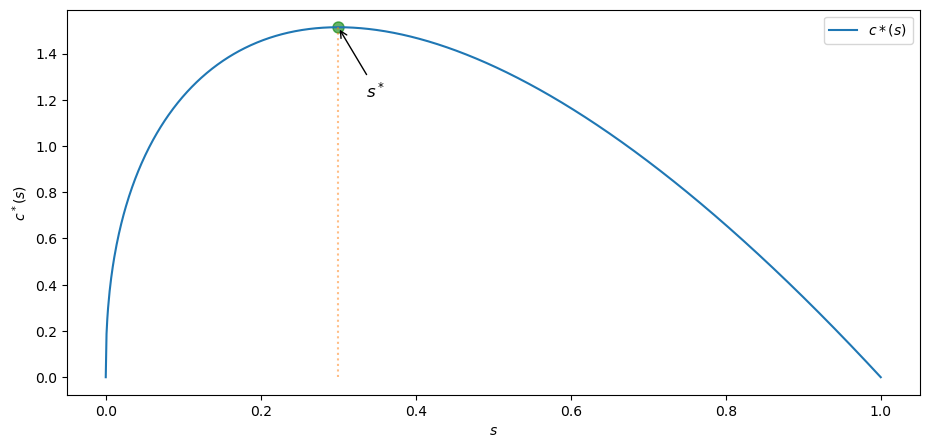

In [19]:
x_s_max = np.array([s_star_max, s_star_max])
y_s_max = np.array([0, c_star_max])

fig, ax = plt.subplots(figsize=[11, 5])

fps = (c_star_max,)

# Highlight the maximum point with a marker
ax.plot((s_star_max, ), (c_star_max,), 'go', ms=8, alpha=0.6)

ax.annotate(r'$s^*$',
         xy=(s_star_max, c_star_max),
         xycoords='data',
         xytext=(20, -50),
         textcoords='offset points',
         fontsize=12,
         arrowprops=dict(arrowstyle="->"))
ax.plot(s_grid, c_star, label=r'$c*(s)$')
ax.plot(x_s_max, y_s_max, alpha=0.5, ls='dotted')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$c^*(s)$')
ax.legend()

plt.show()

也可以尝试用数学方法解决这个问题，即对 $c^*(s)$ 进行微分，并使用 [sympy](https://www.sympy.org/en/index.html) 求解 $\frac{d}{ds}c^*(s)=0$。

In [20]:
from sympy import solve, Symbol

In [21]:
s_symbol = Symbol('s', real=True)
k = ((s_symbol * A) / delta)**(1/(1 - alpha))
c = (1 - s_symbol) * A * k ** alpha

让我们对 $c$ 进行微分，并使用 [sympy.solve](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve) 求解。

In [22]:
# 使用 sympy 求解
s_star = solve(c.diff())[0]
print(f"s_star = {s_star}")

s_star = 0.300000000000000


顺便说一下，使人均消费的稳态水平最大化的储蓄率被称为[黄金法则储蓄率](https://en.wikipedia.org/wiki/Golden_Rule_savings_rate)。

```{solution-end}
```

```{exercise-start}
:label: solow_ex2
```
**随机生产率**

为了使索洛-斯旺模型更贴近实际数据，我们需要考虑如何处理总量中的随机波动。

这样做会带来多方面的影响，其中之一是消除了人均产出 $y_t = A k^\alpha_t$ 收敛到常数 $y^* := A (k^*)^\alpha$ 这一不切实际的预测。

在接下来的讨论中，我们将转向离散时间模型。

一种方法是用某个随机序列 $(A_t)_{t \geq 1}$ 替代常数生产率。

现在的动态方程变为

```{math}
:label: solowran
    k_{t+1} = s A_{t+1} f(k_t) + (1 - \delta) k_t
```

我们假设 $f$ 是柯布-道格拉斯生产函数，且 $(A_t)$ 是独立同分布的对数正态分布。

现在，在确定性情况下获得的长期收敛性不再成立，因为系统在每个时间点都会受到新的冲击。

考虑 $A=2.0, s=0.6, \alpha=0.3,$ 且 $\delta=0.5$。

生成并绘制时间序列 $k_t$ 的图表。

```{exercise-end}
```

```{solution-start} solow_ex2
:class: dropdown
```

让我们定义用于模拟的对数正态分布的常数和初始值

In [23]:
# 定义一下常数
sig = 0.2
mu = np.log(2) - sig**2 / 2
A = 2.0
s = 0.6
alpha = 0.3
delta = 0.5
x0 = [.25, 3.25] # 用于模拟的初始值列表

让我们定义函数 *k_next* 来找出 $k$ 的下一个值

In [24]:
def lgnorm():
    return np.exp(mu + sig * np.random.randn())

def k_next(s, alpha, delta, k):
    return lgnorm() * s * k**alpha + (1 - delta) * k

In [25]:
def ts_plot(x_values, ts_length):
    fig, ax = plt.subplots(figsize=[11, 5])
    ts = np.zeros(ts_length)

    # 模拟并且绘制时间序列
    for x_init in x_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = k_next(s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4,
                alpha=0.6, label=r'$k_0=%g$' %x_init)

    ax.legend(loc='best', fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=12)
    ax.set_ylabel(r'$k_t$', fontsize=12)


    plt.show()

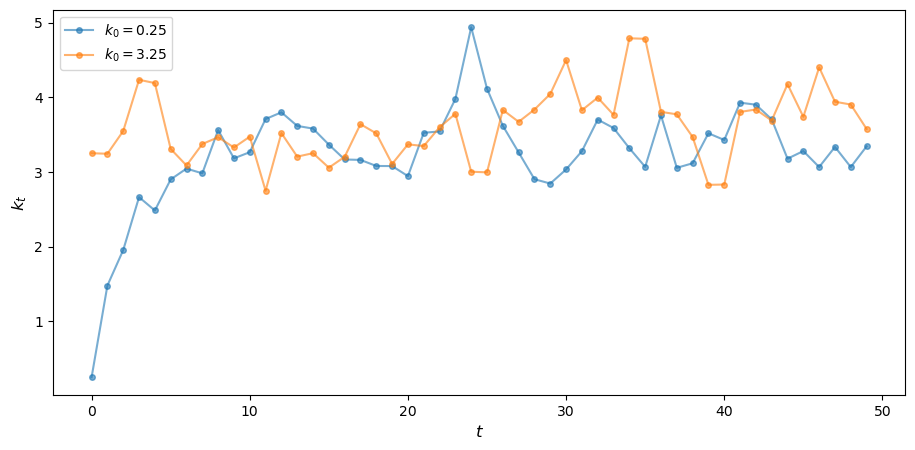

In [26]:
ts_plot(x0, 50)

```{solution-end}
```